In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.special import softmax


from random import sample
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_pickle("dataframes/short_features_logits.pkl")

In [17]:
df["Predicted Class"] = [np.argmax(softmax(l)) for l in df["Logits"]]
df["Error"] = df["Predicted Class"] != df["Class Idx"]

In [18]:
df_errors = df.groupby(by=["Network Name", "Distribution"])["Error"].mean().reset_index()

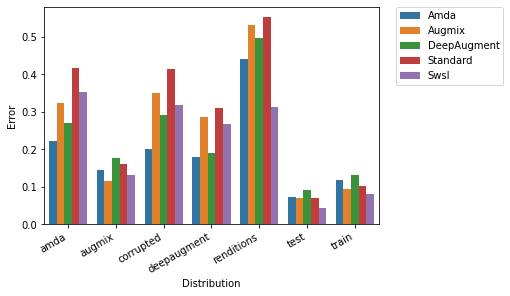

In [30]:
ax = sns.barplot(x="Distribution", y="Error", hue="Network Name", data=df_errors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)